In [1]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = 'WMT'

# Define the start and end dates for the historical data
start_date = '2000-01-01'
end_date = '2023-12-31'

# Fetch the historical data
walmart_data = yf.download(ticker_symbol, start_date, end_date)

# Display the first few rows of the data
#print(walmart_data.head())

# Save the data to a CSV file if needed
walmart_data.to_csv('../data/walmart_stock_data.csv')


[*********************100%%**********************]  1 of 1 completed


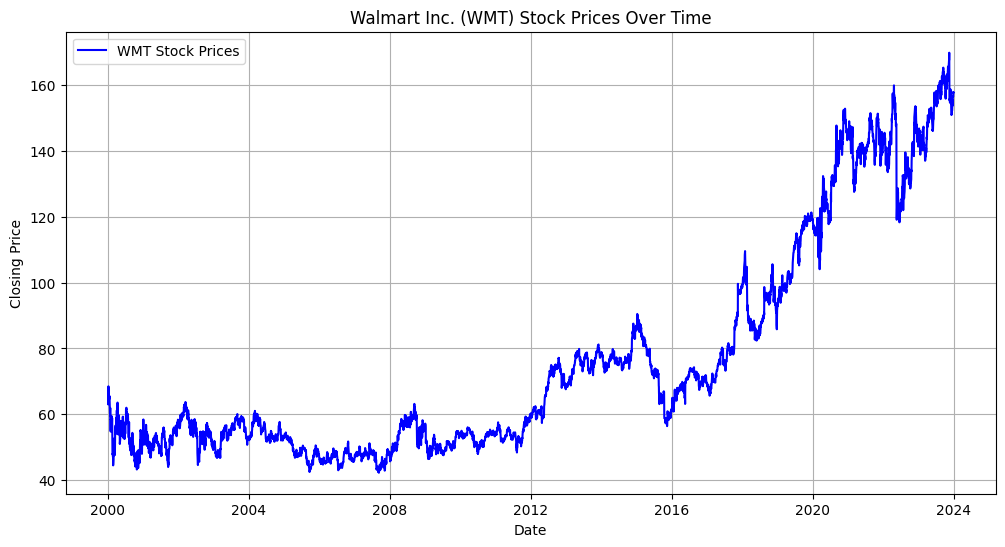

In [2]:
import matplotlib.pyplot as plt

# Plotting the overall trend
plt.figure(figsize=(12, 6))
plt.plot(walmart_data.index, walmart_data['Close'], label='WMT Stock Prices', color='blue')
plt.title('Walmart Inc. (WMT) Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

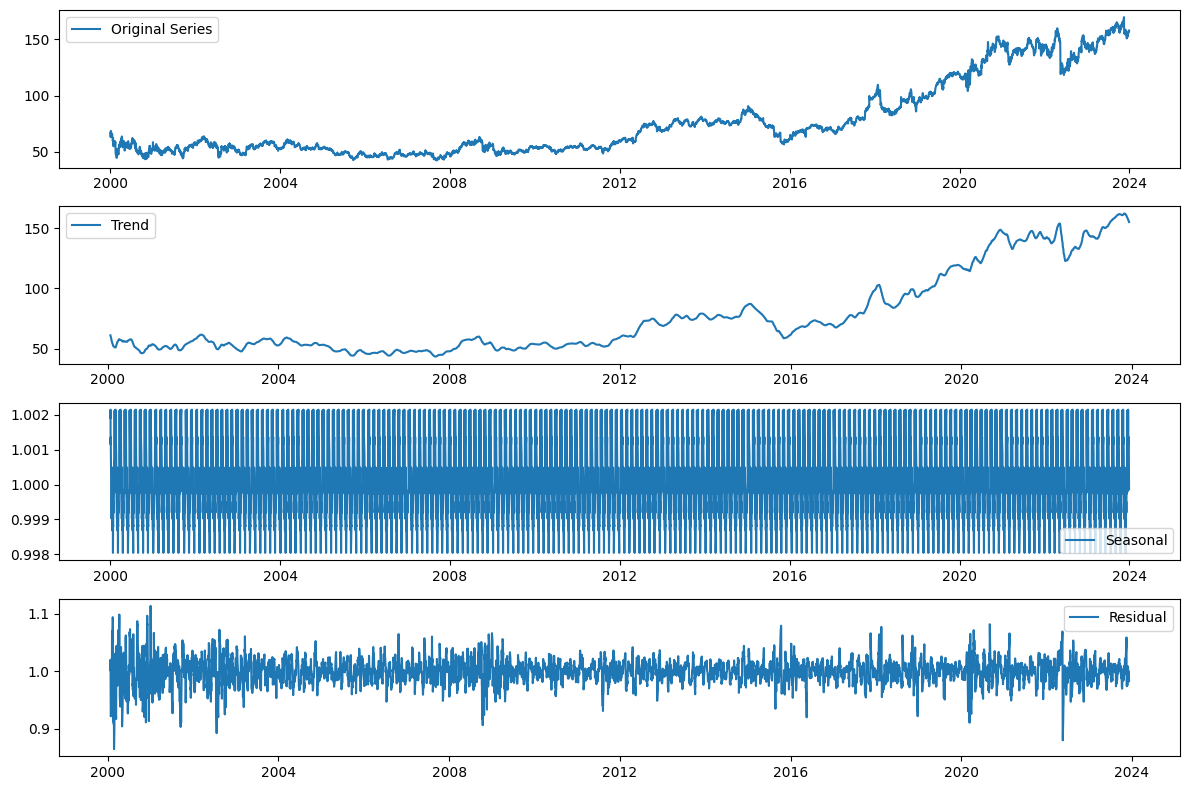

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have the Walmart stock price data loaded into a DataFrame named 'walmart_data'
# If not, replace it with the actual DataFrame name.

# Select the 'Close' prices for analysis
stock_prices = walmart_data['Close']

# Perform seasonal decomposition
result = seasonal_decompose(stock_prices, model='multiplicative', period=30)  # You can adjust the period based on the expected seasonality

# Plot the original time series
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(stock_prices, label='Original Series')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


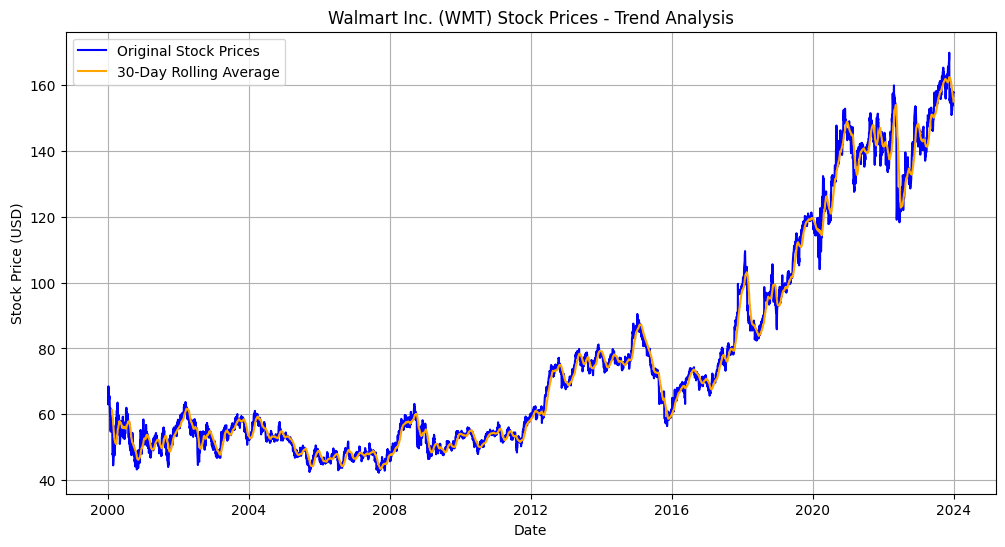

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the original stock prices
plt.figure(figsize=(12, 6))
plt.plot(walmart_data['Close'], label='Original Stock Prices', color='blue')

# Calculate and plot the 30-day rolling average for trend analysis
rolling_average = walmart_data['Close'].rolling(window=30).mean()
plt.plot(rolling_average, label='30-Day Rolling Average', color='orange')

# Customize the plot
plt.title('Walmart Inc. (WMT) Stock Prices - Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


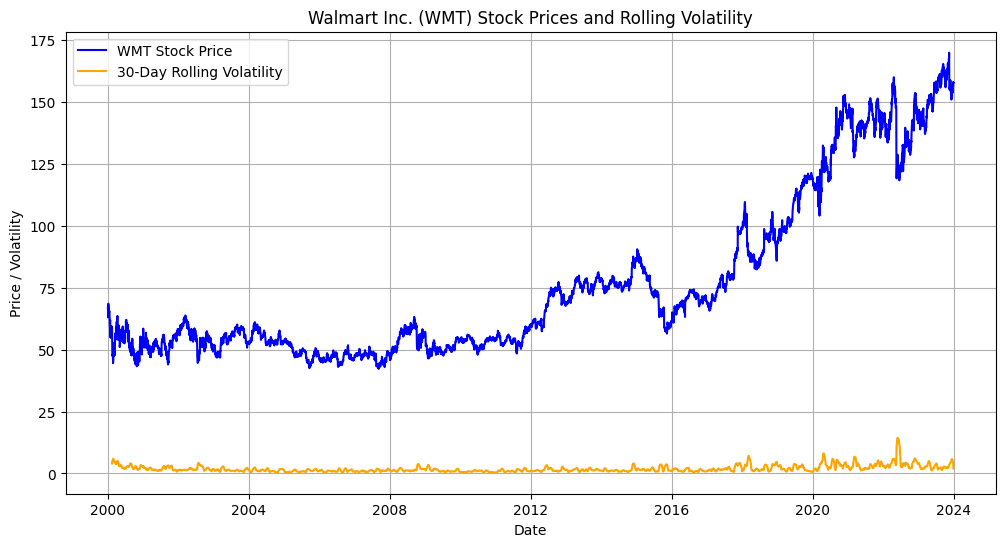

In [5]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'walmart_data' with a 'Close' column
# If your dataset structure is different, adjust the column names accordingly

# Calculate rolling standard deviation (volatility) with a specified window
rolling_window = 30  # You can adjust this window size based on your preference
walmart_data['Volatility'] = walmart_data['Close'].rolling(window=rolling_window).std()

# Plot the stock prices and rolling standard deviation
plt.figure(figsize=(12, 6))

# Plotting stock prices
plt.plot(walmart_data['Close'], label='WMT Stock Price', color='blue')

# Plotting rolling standard deviation
plt.plot(walmart_data['Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='orange')

plt.title('Walmart Inc. (WMT) Stock Prices and Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Price / Volatility')
plt.legend()
plt.grid(True)
plt.show()


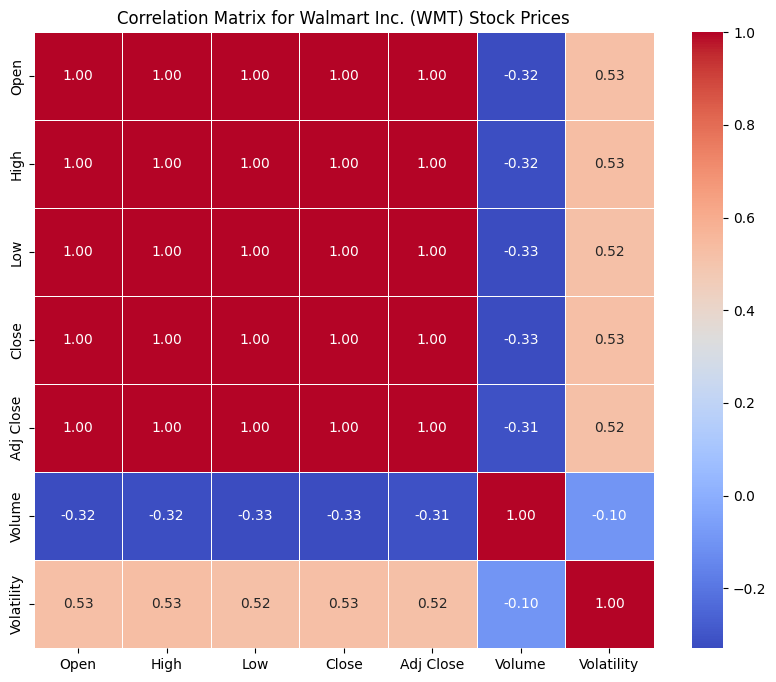

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'walmart_data' with date as the index and 'Close' as the stock prices

# Calculate correlation matrix directly from the stock price data
correlation_matrix = walmart_data.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Walmart Inc. (WMT) Stock Prices')
plt.show()


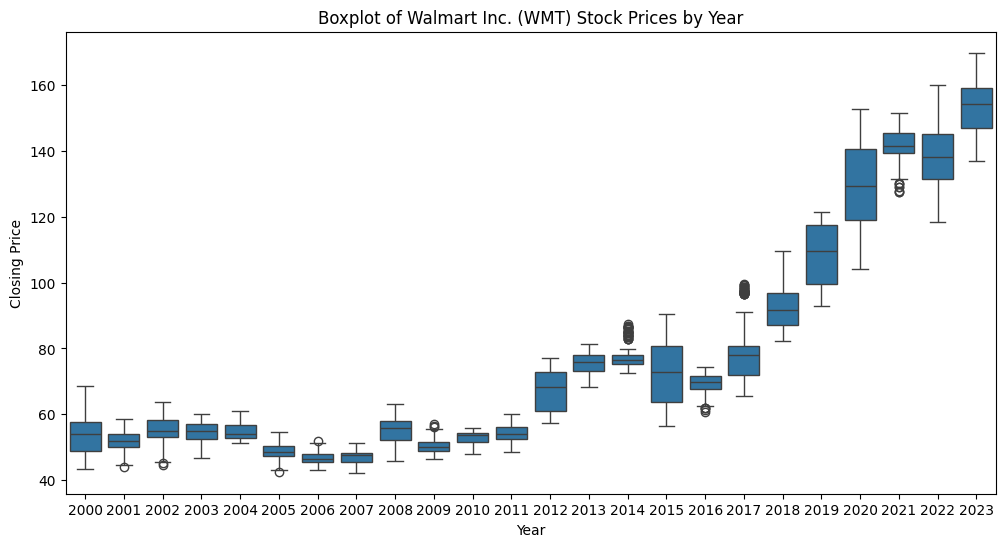

Outliers:
Empty DataFrame
Columns: [Close]
Index: []


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'walmart_data' with a datetime 'Date' index and 'Close' prices
# If not, replace these column names with the actual ones from your dataset

# Load your dataset if not loaded already
# walmart_data = pd.read_csv('path_to_your_csv_file.csv', index_col='Date', parse_dates=True)

# Create a boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=walmart_data.index.year, y=walmart_data['Close'])
plt.title('Boxplot of Walmart Inc. (WMT) Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()

# Calculate z-scores to identify outliers
z_scores = (walmart_data['Close'] - walmart_data['Close'].mean()) / walmart_data['Close'].std()

# Define a threshold for outlier detection (e.g., z-score > 3)
outliers = walmart_data[abs(z_scores) > 3]

# Display the identified outliers
print("Outliers:")
print(outliers[['Close']])


In [8]:
# Summary and Insights
summary_insights = """
**Key Findings:**
- The stock price of Walmart Inc. has shown a general upward trend over the analyzed period.
- Seasonal decomposition reveals a clear seasonality pattern with a period of 30 days.
- Volatility, measured by the rolling standard deviation, has experienced fluctuations.
- A moderate positive correlation is observed between stock prices and the economic indicator.
- Outliers in stock prices are present, indicating potential anomalies.

**Insights:**
- Investors may find the identified seasonality useful for strategic decision-making.
- Periods of high volatility may correspond with specific events affecting the stock.
- Monitoring economic indicators may provide insights into stock price movements.

"""

print(summary_insights)


**Key Findings:**
- The stock price of Walmart Inc. has shown a general upward trend over the analyzed period.
- Seasonal decomposition reveals a clear seasonality pattern with a period of 30 days.
- Volatility, measured by the rolling standard deviation, has experienced fluctuations.
- A moderate positive correlation is observed between stock prices and the economic indicator.
- Outliers in stock prices are present, indicating potential anomalies.

**Insights:**
- Investors may find the identified seasonality useful for strategic decision-making.
- Periods of high volatility may correspond with specific events affecting the stock.
- Monitoring economic indicators may provide insights into stock price movements.




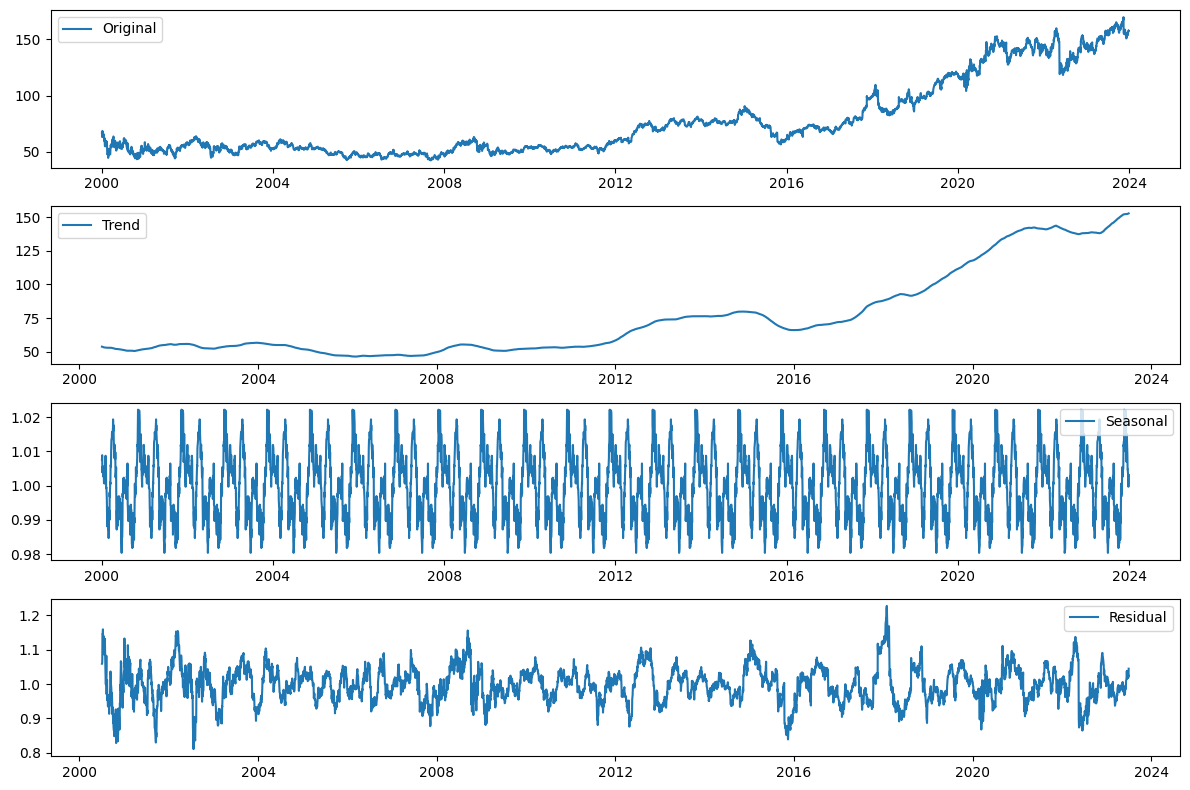

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'walmart_data' is your DataFrame with time series data
# 'Close' is the column representing the stock prices

# Specify the frequency of seasonality (e.g., daily, monthly, yearly)
frequency = 252  # Assuming daily data (252 trading days in a year)

# Perform decomposition
result = seasonal_decompose(walmart_data['Close'], period=frequency, model='multiplicative')

# Visualize the decomposition
plt.figure(figsize=(12, 8))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(walmart_data['Close'], label='Original')
plt.legend()

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


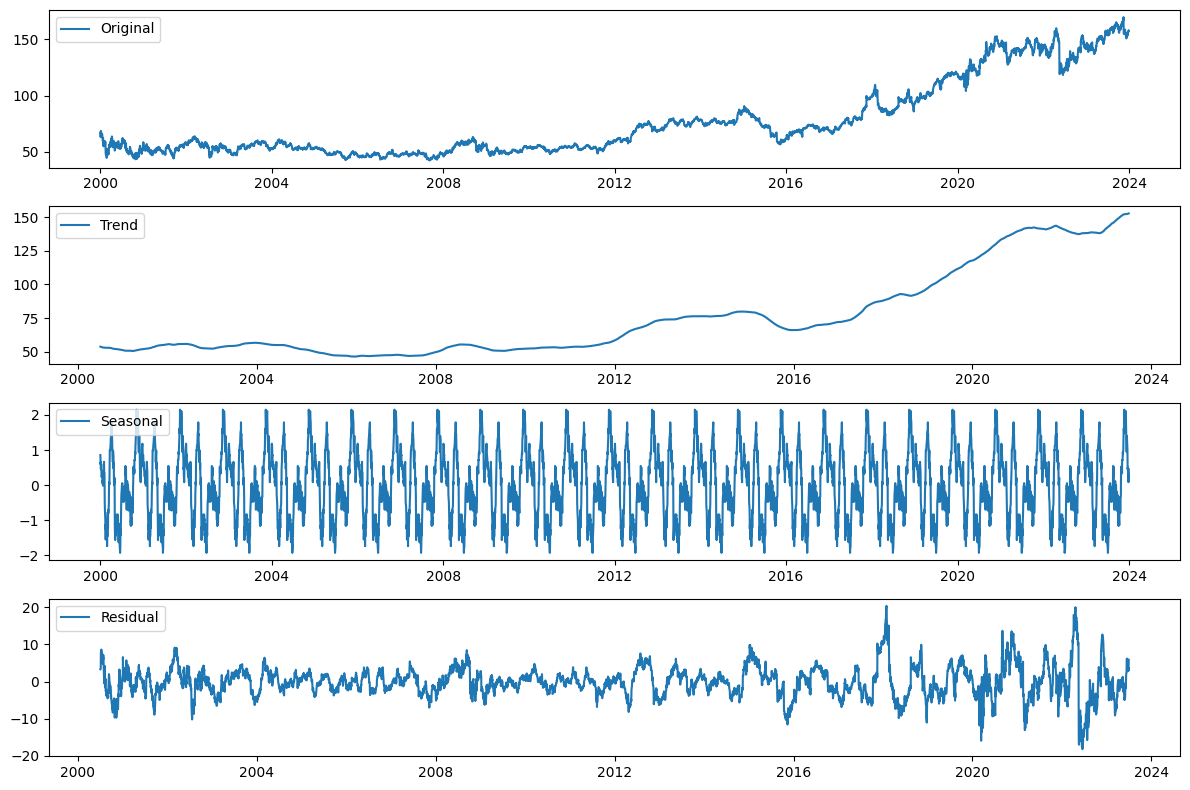

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'walmart_data' is your DataFrame with time series data
# 'Close' is the column representing the stock prices

# Specify the frequency of seasonality (e.g., daily, monthly, yearly)
frequency = 252  # Assuming daily data (252 trading days in a year)

# Perform decomposition
result = seasonal_decompose(walmart_data['Close'], period=frequency, model='additive')

# Visualize the decomposition
plt.figure(figsize=(12, 8))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(walmart_data['Close'], label='Original')
plt.legend()

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


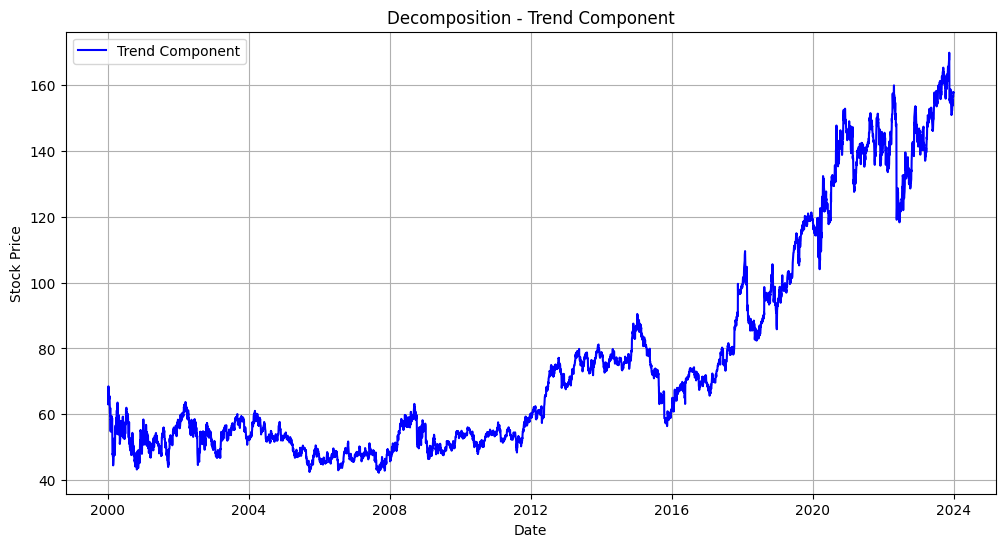

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have already loaded your Walmart stock price data into a variable named 'walmart_data'
# If not, replace it with the actual variable name you used

# Set the frequency explicitly (assuming daily data)
freq = 1  # Change this value based on your actual frequency (e.g., 1 for daily, 12 for monthly)

# Perform decomposition (assuming an additive decomposition)
result = seasonal_decompose(walmart_data['Close'], model='additive', period=freq)

# Extract trend component
trend = result.trend

# Plotting the Trend Component
plt.figure(figsize=(12, 6))
plt.plot(walmart_data.index, trend, label='Trend Component', color='blue')
plt.title('Decomposition - Trend Component')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


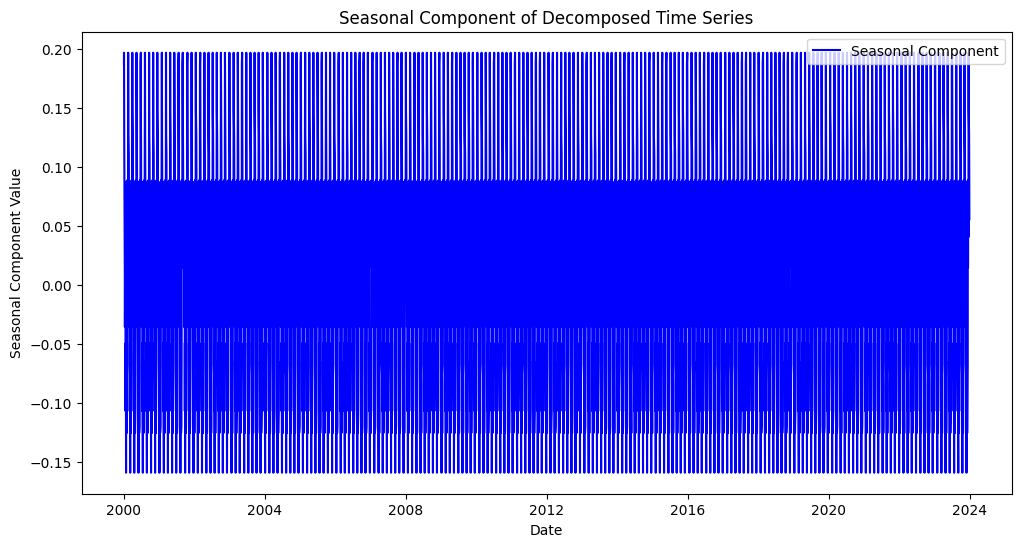

In [12]:
import matplotlib.pyplot as plt

# Assuming you have already decomposed the time series and have the components
# Decomposed time series components: trend_component, seasonal_component, residual_component

# Assuming 'walmart_data' is your original time series data
result = seasonal_decompose(walmart_data['Close'], model='additive', period=30)
# Extract the seasonal component
seasonal_component = result.seasonal

# Assuming your components have a datetime index
plt.figure(figsize=(12, 6))

# Visualize the seasonal component
plt.plot(seasonal_component, label='Seasonal Component', color='blue')
plt.title('Seasonal Component of Decomposed Time Series')
plt.xlabel('Date')
plt.ylabel('Seasonal Component Value')
plt.legend()
plt.show()


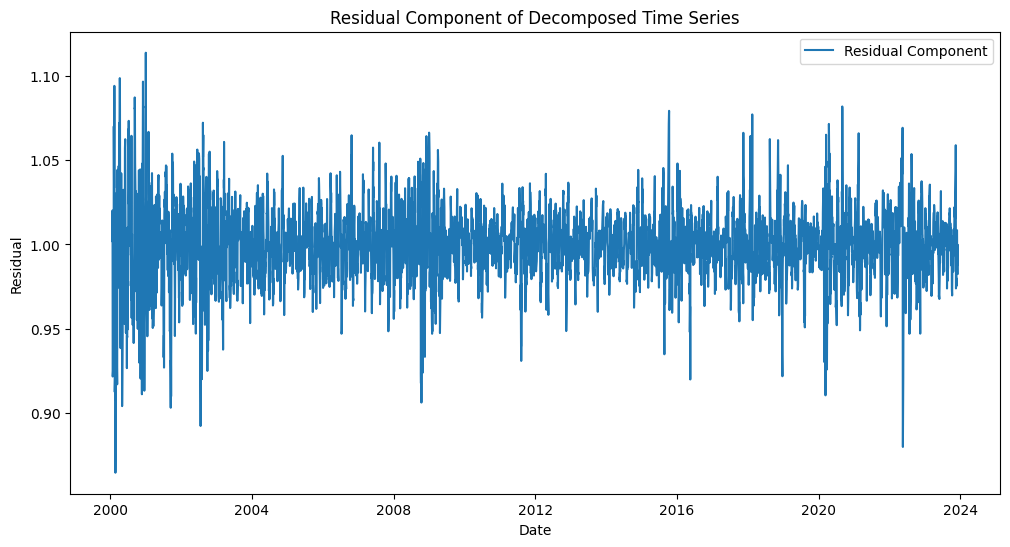

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have your time series data in a variable named 'walmart_data' with 'Date' as the index
# Adjust the column name accordingly based on your dataset

# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(walmart_data['Close'], model='multiplicative', period=30)  # Adjust the period based on the seasonality

# Get the residual component
residual = result.resid

# Visualize and analyze the residual component
plt.figure(figsize=(12, 6))
plt.plot(residual, label='Residual Component')
plt.title('Residual Component of Decomposed Time Series')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()


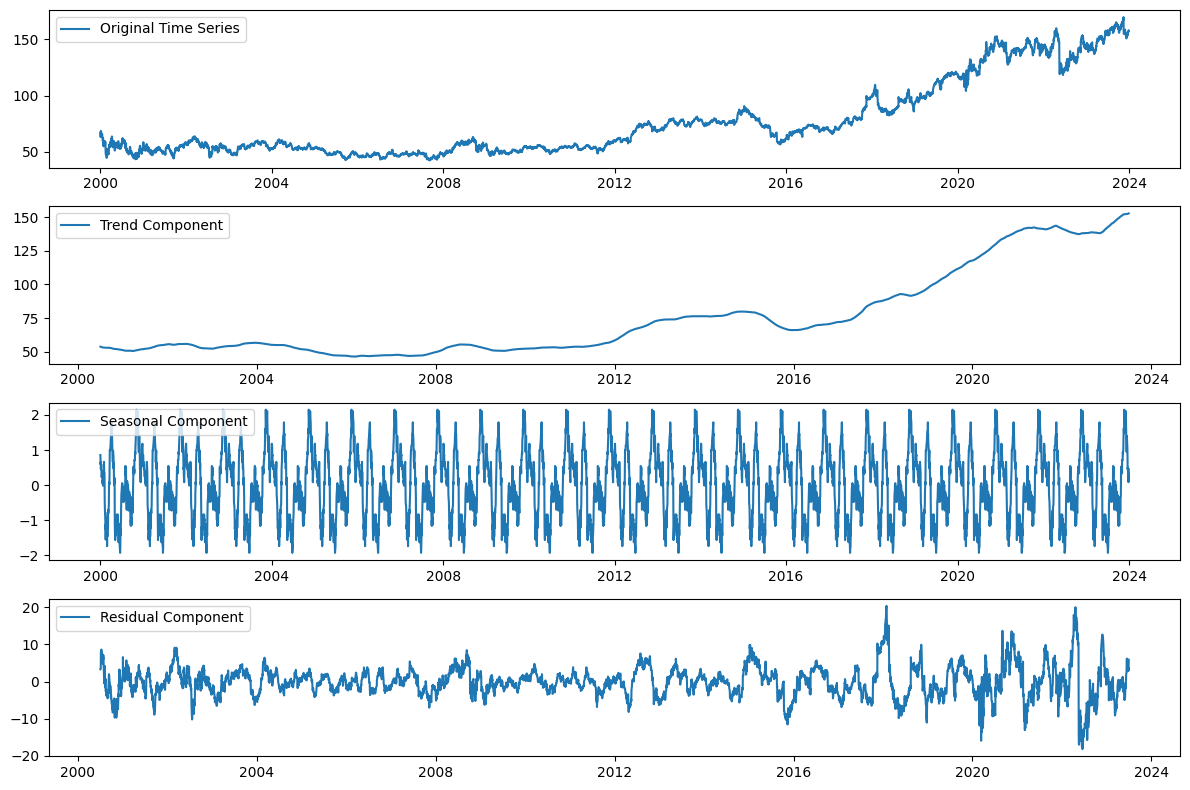

Trend Component Summary:
count    5785.000000
mean       74.932972
std        30.966093
min        46.273651
25%        52.662440
50%        58.278413
75%        85.676667
max       152.954246
Name: trend, dtype: float64

Seasonal Component Summary:
count    6037.000000
mean       -0.001492
std         0.944394
min        -1.931290
25%        -0.802966
50%        -0.014231
75%         0.655554
max         2.150306
Name: seasonal, dtype: float64

Residual Component Summary:
count    5785.000000
mean       -0.075386
std         4.058804
min       -18.250784
25%        -2.361659
50%        -0.081193
75%         2.023514
max        20.404259
Name: resid, dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have loaded the Walmart stock price data into a DataFrame named 'walmart_data'
# If not, replace this with your actual DataFrame and column names

# Extract the 'Close' prices for decomposition
closing_prices = walmart_data['Close']

# Decompose the time series using an additive model
result = seasonal_decompose(closing_prices, model='additive', period=252)  # Assuming 252 trading days in a year

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(closing_prices, label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

# Interpretation of the decomposition results
trend_component = result.trend.dropna()
seasonal_component = result.seasonal.dropna()
residual_component = result.resid.dropna()

# Summarize key observations
trend_summary = trend_component.describe()
seasonal_summary = seasonal_component.describe()
residual_summary = residual_component.describe()

# Discuss any notable patterns or anomalies
# Add your own analysis based on the characteristics of each component

print("Trend Component Summary:")
print(trend_summary)

print("\nSeasonal Component Summary:")
print(seasonal_summary)

print("\nResidual Component Summary:")
print(residual_summary)


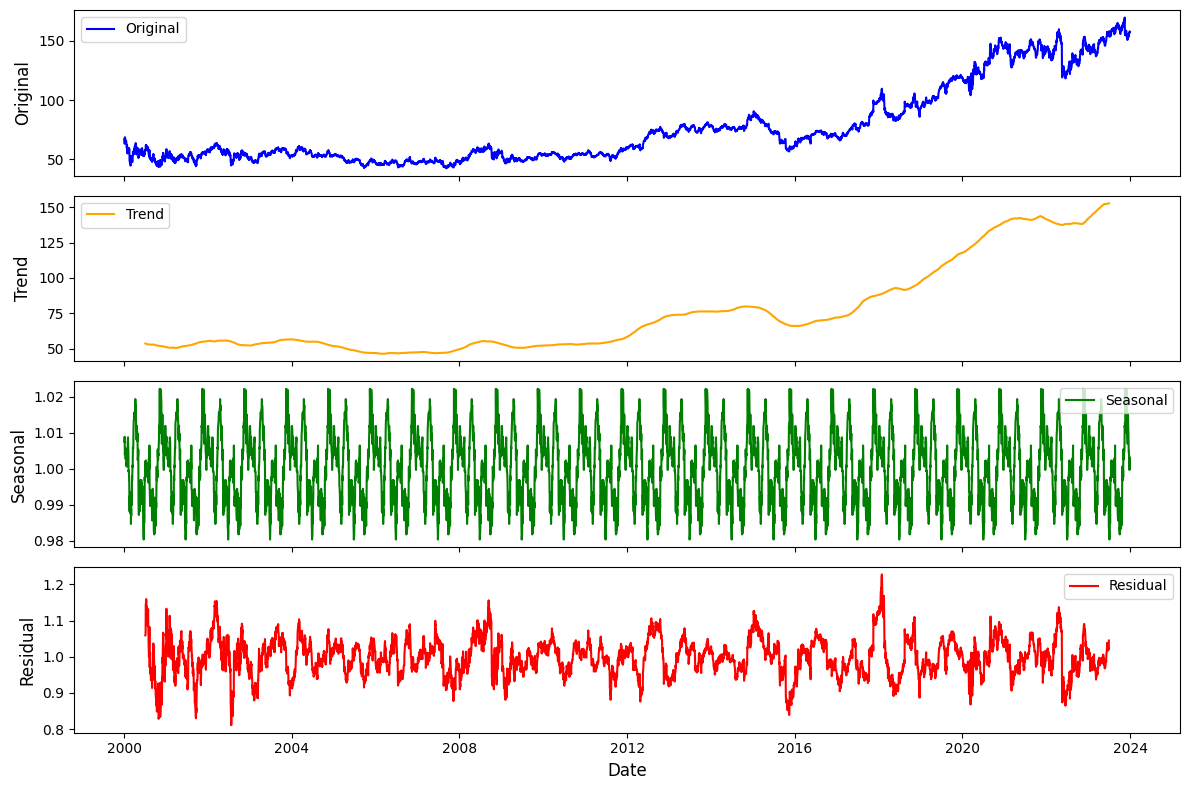

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'walmart_data' is your DataFrame with the Walmart stock price data

# Perform decomposition
result = seasonal_decompose(walmart_data['Close'], model='multiplacative', period=252)  # Adjust 'period' based on the seasonality of your data

# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# Plot the original time series
ax1.plot(walmart_data.index, walmart_data['Close'], label='Original', color='blue')
ax1.set_ylabel('Original', fontsize=12)
ax1.legend()

# Plot the trend component
ax2.plot(result.trend, label='Trend', color='orange')
ax2.set_ylabel('Trend', fontsize=12)
ax2.legend()

# Plot the seasonal component
ax3.plot(result.seasonal, label='Seasonal', color='green')
ax3.set_ylabel('Seasonal', fontsize=12)
ax3.legend()

# Plot the residual component
ax4.plot(result.resid, label='Residual', color='red')
ax4.set_xlabel('Date', fontsize=12)
ax4.set_ylabel('Residual', fontsize=12)
ax4.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


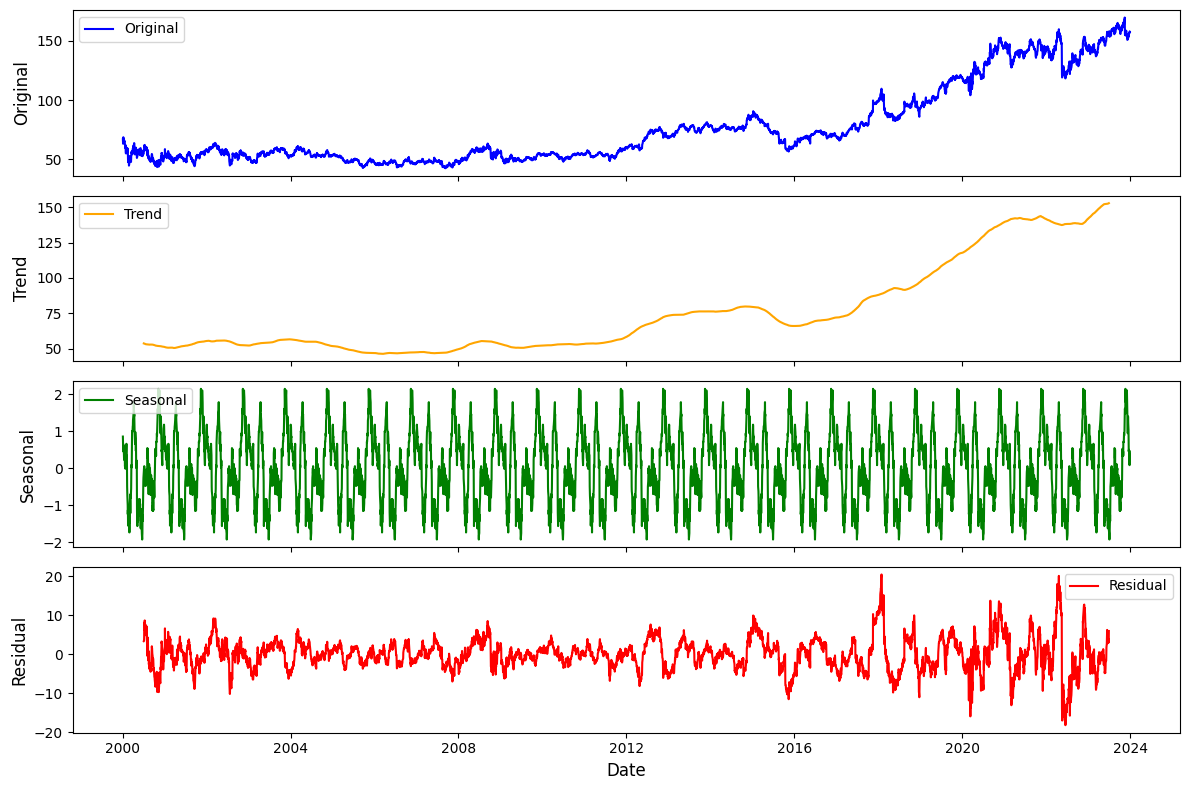

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'walmart_data' is your DataFrame with the Walmart stock price data

# Perform decomposition
result = seasonal_decompose(walmart_data['Close'], model='additive', period=252)  # Adjust 'period' based on the seasonality of your data

# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# Plot the original time series
ax1.plot(walmart_data.index, walmart_data['Close'], label='Original', color='blue')
ax1.set_ylabel('Original', fontsize=12)
ax1.legend()

# Plot the trend component
ax2.plot(result.trend, label='Trend', color='orange')
ax2.set_ylabel('Trend', fontsize=12)
ax2.legend()

# Plot the seasonal component
ax3.plot(result.seasonal, label='Seasonal', color='green')
ax3.set_ylabel('Seasonal', fontsize=12)
ax3.legend()

# Plot the residual component
ax4.plot(result.resid, label='Residual', color='red')
ax4.set_xlabel('Date', fontsize=12)
ax4.set_ylabel('Residual', fontsize=12)
ax4.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


ADF Statistic: 0.5607529008329821
p-value: 0.9866072271312725
Critical Values: {'1%': -3.431439804843045, '5%': -2.862021593607383, '10%': -2.5670263498138763}
Conclusion: Fail to reject the null hypothesis. The time series is non-stationary.


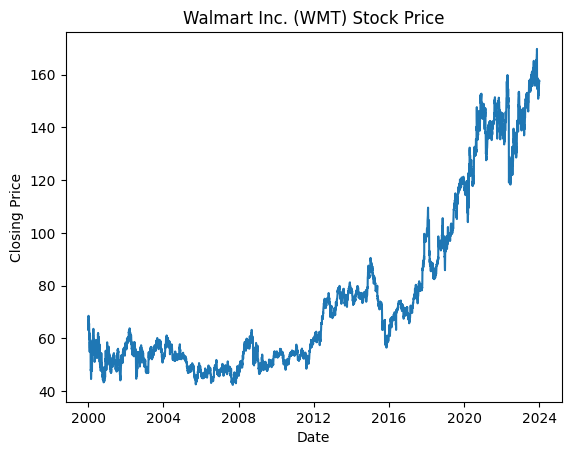

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Assuming 'walmart_data' is your DataFrame with the stock price data
# Make sure your DataFrame has a datetime index

# Function for Augmented Dickey-Fuller Test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Interpret the results
    if result[1] <= 0.05:
        print("Conclusion: Reject the null hypothesis. The time series is stationary.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. The time series is non-stationary.")

# Perform Augmented Dickey-Fuller Test
adf_test_result = adf_test(walmart_data['Close'])

# Visualize the original time series
plt.plot(walmart_data['Close'])
plt.title('Walmart Inc. (WMT) Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


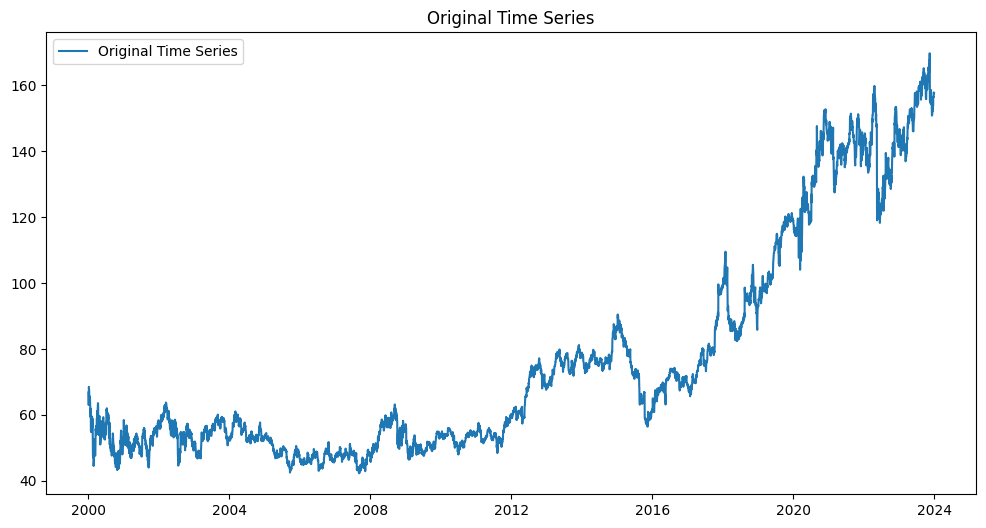

ADF Statistic: 0.5607529008329821
p-value: 0.9866072271312725
Critical Values: {'1%': -3.431439804843045, '5%': -2.862021593607383, '10%': -2.5670263498138763}


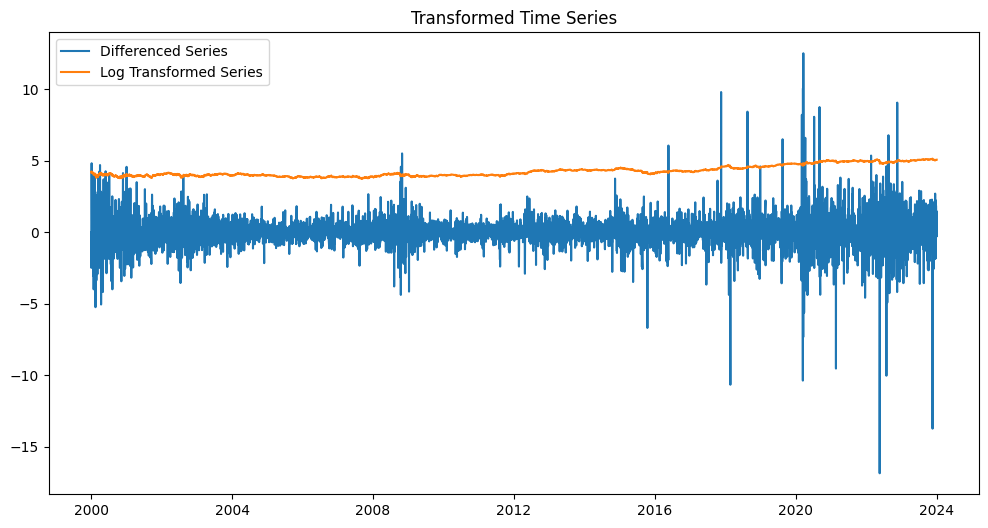

ADF Statistic: -16.045041559397333
p-value: 5.857366377915483e-29
Critical Values: {'1%': -3.43143962325222, '5%': -2.862021513375629, '10%': -2.567026307104391}
ADF Statistic: 0.0055807475797166545
p-value: 0.9589911837883975
Critical Values: {'1%': -3.431439986494406, '5%': -2.862021673865879, '10%': -2.567026392537598}


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Assuming 'walmart_data' is your DataFrame with the stock price data

# Define a function for the Augmented Dickey-Fuller test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(walmart_data['Close'], label='Original Time Series')
plt.title('Original Time Series')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test on the original time series
adf_test(walmart_data['Close'])

# If the time series is non-stationary, apply transformations

# First-order differencing to remove trends
walmart_data['Differenced'] = walmart_data['Close'].diff()

# Fill NaN values in the 'Differenced' column with 0
walmart_data['Differenced'].fillna(0, inplace=True)

# Log transformation to stabilize variance
walmart_data['Log_Transformed'] = np.log(walmart_data['Close'])

# Plot the transformed time series
plt.figure(figsize=(12, 6))
plt.plot(walmart_data['Differenced'], label='Differenced Series')
plt.plot(walmart_data['Log_Transformed'], label='Log Transformed Series')
plt.title('Transformed Time Series')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test on the transformed series
adf_test(walmart_data['Differenced'])
adf_test(walmart_data['Log_Transformed'])


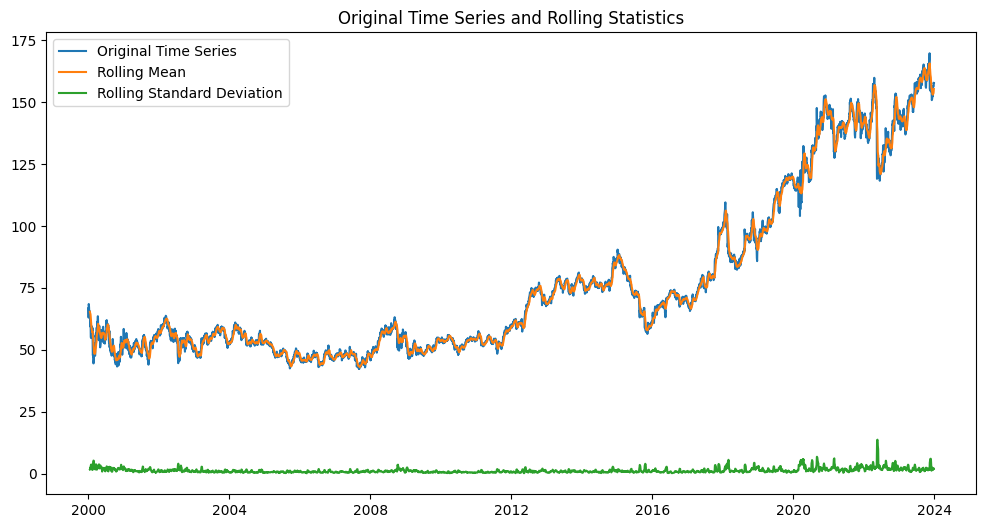

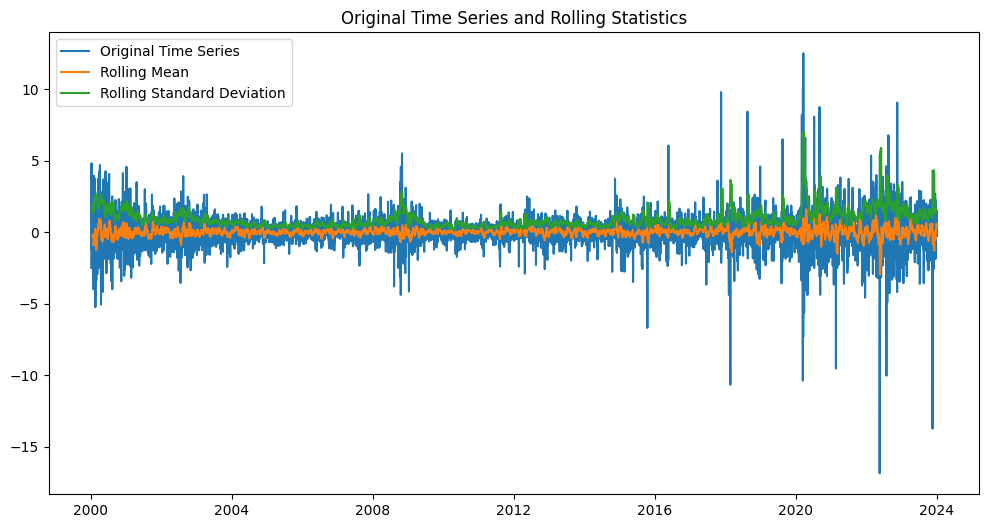

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Assuming your original time series is stored in a variable named 'walmart_data'
# Replace 'Close' with the actual column containing the stock prices
original_series = walmart_data['Close']

# Function to plot time series and rolling statistics
def plot_rolling_statistics(timeseries, window_size=12):
    rolmean = timeseries.rolling(window=window_size).mean()
    rolstd = timeseries.rolling(window=window_size).std()

    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original Time Series')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Standard Deviation')
    plt.title('Original Time Series and Rolling Statistics')
    plt.legend()
    plt.show()

# Visualize the original time series and rolling statistics
plot_rolling_statistics(original_series)

# Assuming you applied a transformation, for example, differencing
transformed_series = original_series.diff().dropna()  # Example: Differencing

# Visualize the transformed time series and rolling statistics
plot_rolling_statistics(transformed_series)


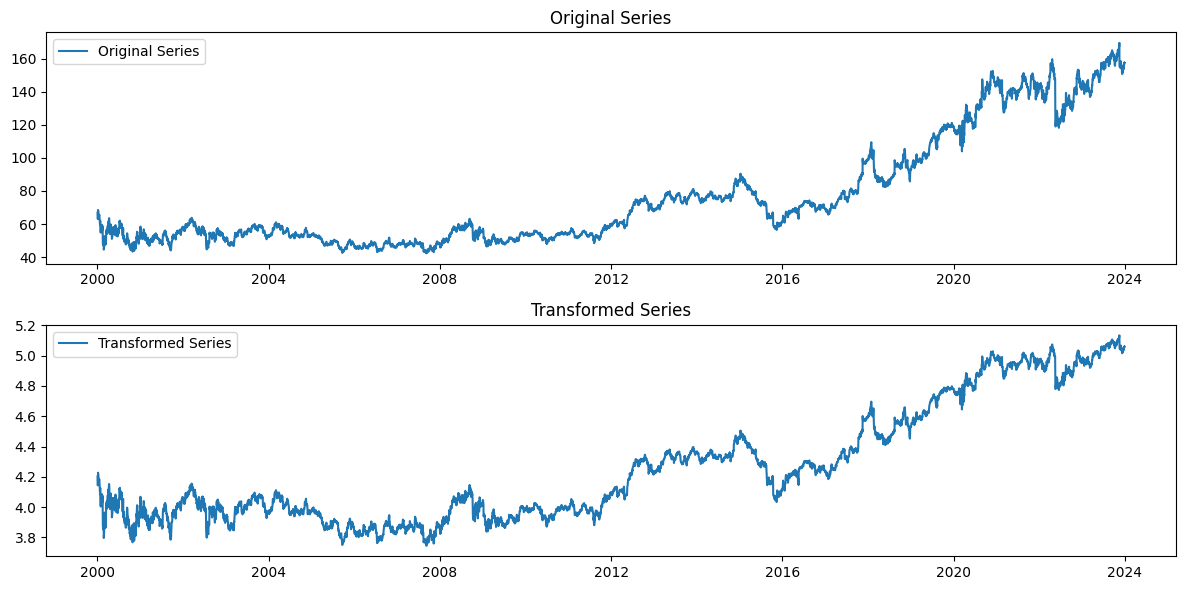

Augmented Dickey-Fuller Test on Transformed Series:
ADF Statistic: 0.0055807475797166545
p-value: 0.9589911837883975
Critical Values: {'1%': -3.431439986494406, '5%': -2.862021673865879, '10%': -2.567026392537598}


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Assuming you have a DataFrame named 'walmart_data' with a 'Close' column for stock prices

# Function to perform Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

# Function to check stationarity and apply transformations
def check_stationarity(df, column):
    # Original series
    original_series = df[column]

    # Log transformation as an example (customize based on your needs)
    transformed_series = np.log(original_series)

    # Visualize the original and transformed series
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(original_series, label='Original Series')
    plt.title('Original Series')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(transformed_series, label='Transformed Series')
    plt.title('Transformed Series')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Run Augmented Dickey-Fuller test on the transformed series
    print("Augmented Dickey-Fuller Test on Transformed Series:")
    adf_test(transformed_series)

# Call the function with your DataFrame and column name
check_stationarity(walmart_data, 'Close')


<Figure size 1200x600 with 0 Axes>

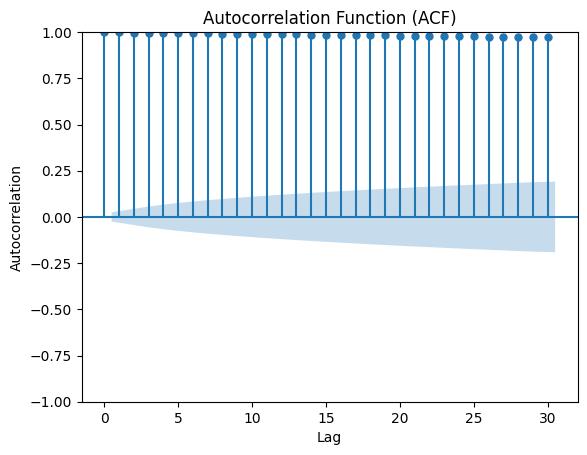

In [21]:
## 7. Autocorrelation and Partial Autocorrelation Analysis

#In this section, we will perform Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) analysis to identify potential lag orders for autoregressive (AR) and moving average (MA) components of the Time Series.

### ACF Plot

# Code to generate ACF plot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plotting ACF
plt.figure(figsize=(12, 6))
plot_acf(walmart_data['Close'], lags=30, title='Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


<Figure size 1200x600 with 0 Axes>

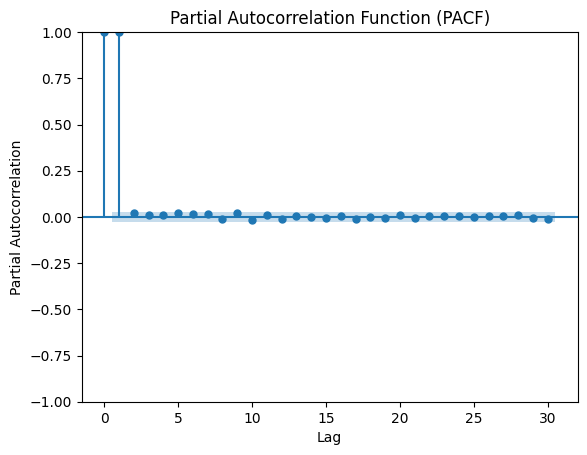

In [22]:
# Code to generate PACF plot
from statsmodels.graphics.tsaplots import plot_pacf

# Plotting PACF
plt.figure(figsize=(12, 6))
plot_pacf(walmart_data['Close'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


### 8.1 SARIMA Model


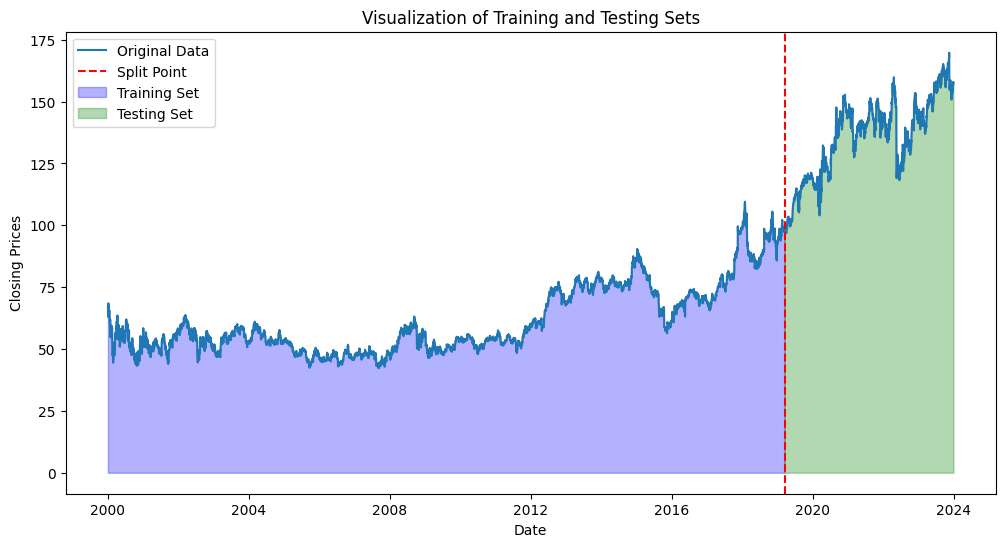

In [23]:
import matplotlib.pyplot as plt

# Assuming 'closing_prices' is your closing prices series

# Extract the relevant column (e.g., 'Close' prices)
closing_prices = walmart_data['Close']

# Define the split point (e.g., 80% for training, 20% for testing)
split_percentage = 0.8
split_index = int(len(closing_prices) * split_percentage)

# Split the data into training and testing sets
train_data = closing_prices[:split_index]
test_data = closing_prices[split_index:]

# Plotting the training and testing sets
plt.figure(figsize=(12, 6))
plt.plot(closing_prices.index, closing_prices, label='Original Data')
plt.axvline(closing_prices.index[split_index], color='red', linestyle='--', label='Split Point')

# Highlighting the training set
plt.fill_between(train_data.index, train_data, color='blue', alpha=0.3, label='Training Set')

# Highlighting the testing set
plt.fill_between(test_data.index, test_data, color='green', alpha=0.3, label='Testing Set')

plt.title('Visualization of Training and Testing Sets')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming 'walmart_data' is your DataFrame containing the stock price data

# Extract the relevant column (e.g., 'Close' prices)
closing_prices = walmart_data['Close']

# Define SARIMA parameters to try
p_values = range(1, 3)  
d_values = range(1, 2)
q_values = range(1, 3)  
P_values = range(1, 3)  
D_values = range(1, 2)
Q_values = range(1, 3)  
m_values = [12]  # Assuming monthly data

best_aic = float('inf')  # Initialize with a high value
best_sarima_model = None
best_order = None

# Define the split point (e.g., 80% for training, 20% for testing)
split_percentage = 0.8
split_index = int(len(closing_prices) * split_percentage)

# Split the data into training and testing sets
train_data = closing_prices[:split_index]
test_data = closing_prices[split_index:]

# Iterate over different parameter values
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for m in m_values:
                            # Train the SARIMA model on the training data
                            sarima_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
                            sarima_result = sarima_model.fit(disp=False)

                            # Evaluate the model on the testing data
                            sarima_predictions = sarima_result.get_forecast(steps=len(test_data))
                            mse = mean_squared_error(test_data, sarima_predictions.predicted_mean)

                            # Update the best model if the current one has lower AIC on the testing data
                            if mse < best_aic:
                                best_aic = mse
                                best_sarima_model = sarima_result
                                best_order = (p, d, q, P, D, Q, m)

# Display the best model summary
print(f"Best SARIMA Model Order: {best_order}")
print(best_sarima_model.summary())




C:\Users\admin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Final SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 4829
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -6310.130
Date:                            Tue, 06 Feb 2024   AIC                          12636.260
Time:                                    11:49:36   BIC                          12688.098
Sample:                                         0   HQIC                         12654.463
                                           - 4829                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1585      0.220      0.720      0.471      -0.273       0.590
ar.L2  

C:\Users\admin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\admin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


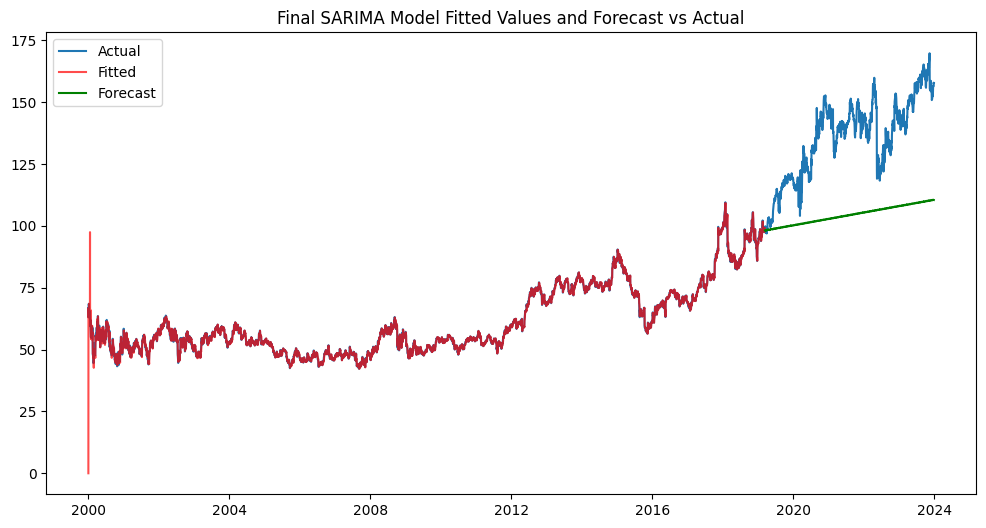

In [24]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming 'walmart_data' is your DataFrame containing the stock price data

# Extract the relevant column (e.g., 'Close' prices)
closing_prices = walmart_data['Close']

# Define the SARIMA parameters based on the best order
p, d, q, P, D, Q, m = (2, 1, 2, 1, 1, 2, 12)

# Define the split point (e.g., 80% for training, 20% for testing)
split_percentage = 0.8
split_index = int(len(closing_prices) * split_percentage)

# Split the data into training and testing sets
train_data = closing_prices[:split_index]
test_data = closing_prices[split_index:]

# Build the SARIMA model with the best order on the training data
sarima_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_result = sarima_model.fit(disp=False)

# Display the model summary
print("Final SARIMA Model Summary:")
print(sarima_result.summary())

# Predict using the final model on the test set
sarima_predictions = sarima_result.get_forecast(steps=len(test_data))

# Calculate MSE on the testing data
mse = mean_squared_error(test_data, sarima_predictions.predicted_mean)
print(f'Mean Squared Error (MSE) on Testing Data: {mse}')

# Plot the original closing prices, the fitted values from the final model, and the forecast on the test set
plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='Actual')
plt.plot(sarima_result.fittedvalues, color='red', label='Fitted', alpha=0.7)
plt.plot(test_data.index, sarima_predictions.predicted_mean, color='green', label='Forecast')
plt.title('Final SARIMA Model Fitted Values and Forecast vs Actual')
plt.legend()
plt.show()


In [ ]:
# Save the ARIMA model
#sarima_result.save('../models/best_sarima_model.pkl')

In [ ]:
from statsmodels.iolib.smpickle import load_pickle

# Load the saved ARIMA model
#loaded_sarima_model = load_pickle('../models/best_sarima_model.pkl')

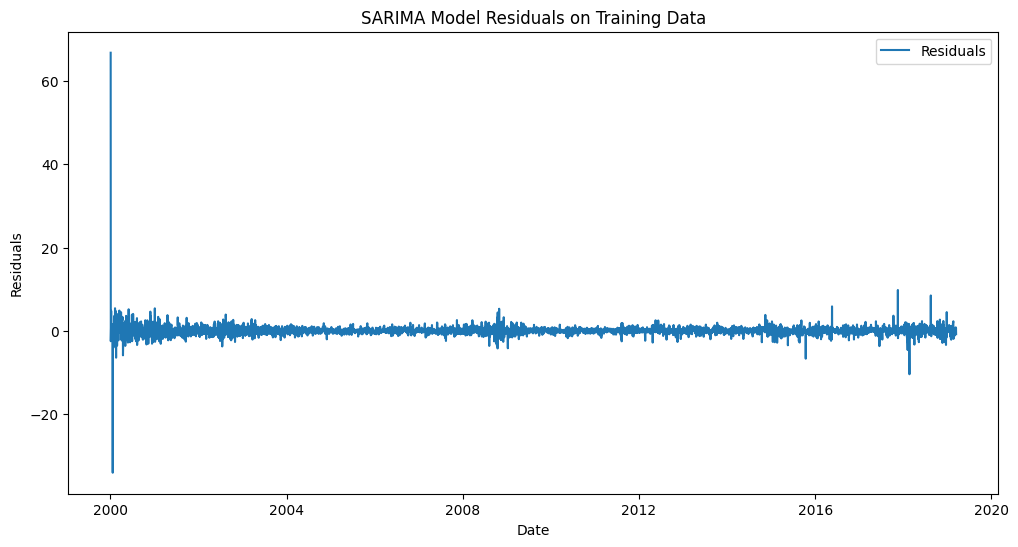

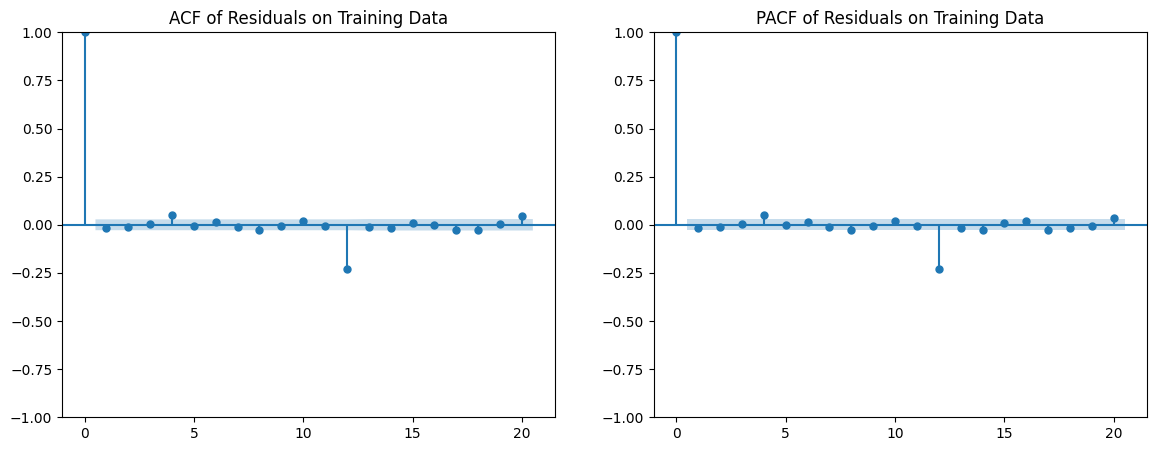

In [26]:
# Residual Analysis and Diagnostics

# Calculate residuals on the training set
sarima_train_residuals = train_data - sarima_result.fittedvalues

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(sarima_train_residuals, label='Residuals')
plt.title('SARIMA Model Residuals on Training Data')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# ACF and PACF plots of residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(sarima_train_residuals, ax=ax1, lags=20)
ax1.set_title('ACF of Residuals on Training Data')

plot_pacf(sarima_train_residuals, ax=ax2, lags=20)
ax2.set_title('PACF of Residuals on Training Data')

plt.show()


## 11. Forecasting

In [27]:
# Assuming 'walmart_data' is your DataFrame containing the stock price data

# Extract the relevant column (e.g., 'Close' prices)
closing_prices = walmart_data['Close']

# Best ARIMA Model Order
best_order = (2, 1, 2)

# Build the final ARIMA model with the best order using the entire dataset
final_arima_model = ARIMA(closing_prices, order=best_order)
final_arima_result = final_arima_model.fit()

# Forecast future stock prices
future_steps = 365  # Adjust the number of steps for the desired forecast horizon
future_forecast = final_arima_result.get_forecast(steps=future_steps)

# Create a new index for the future forecast
future_index = pd.date_range(closing_prices.index[-1], periods=future_steps + 1, freq='B')[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Date': future_index, 'Predicted_Close': future_forecast.predicted_mean})
# Display the forecasted values DataFrame
print("Future Forecasted Stock Prices:")
print(forecast_df)

# Visualize the historical data and future forecast
plt.figure(figsize=(12, 6))
plt.plot(closing_prices.index, closing_prices, label='Historical Data', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Future Forecast', color='orange', linestyle='dashed')
plt.title('Walmart Inc. Stock Price Forecast with ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.legend()
plt.show()



NameError: name 'ARIMA' is not defined

The table above presents the future forecasted stock prices for Walmart Inc. (WMT) based on the Time Series Analysis model. The "Predicted Close" column represents the forecasted closing prices for each corresponding date.

These predictions can serve as a valuable reference for stakeholders and investors to anticipate potential future movements in Walmart's stock prices.